# Logistic Regression


Logistic Regression is a statistical method and a fundamental algorithm in machine learning used for binary and multiclass classification tasks. Despite its name, it is a classification algorithm, not a regression algorithm. Logistic Regression models the relationship between a binary dependent variable (target variable) and one or more independent variables (features) by estimating the probabilities of different outcomes.

# Abstract

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Information
The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attributes
Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


##other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)


18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [22]:
#AGENDA
'''
1- Import the data
2-EDA
3-FEATURE ENG.
  a)-Encoing
  b)-rescaling
4-FEATURE SELECTION
  a)IV
  B) CHI-SQUARE TESTING
  C)VIF
  D)RFE ETC
5-MODEL BUILDING----->LOGISTIC REGRESSION
6-MODEL VALIDATION----->METRICS

'''

'\n1- Import the data\n2-EDA\n3-FEATURE ENG.\n  a)-Encoing\n  b)-rescaling\n4-FEATURE SELECTION\n  a)IV \n  B) CHI-SQUARE TESTING\n  C)VIF\n  D)RFE ETC\n5-MODEL BUILDING----->LOGISTIC REGRESSION\n6-MODEL VALIDATION----->METRICS\n\n'

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data=pd.read_csv('/content/bank-additional-full-1.csv',sep=';')

In [49]:
data.head()

age        job  marital    education  default housing loan    contact  \
0  56.0  housemaid  married     basic.4y       no      no   no  telephone   
1  57.0   services  married  high.school  unknown      no   no  telephone   
2  37.0   services  married  high.school       no     yes   no  telephone   
3  40.0     admin.  married     basic.6y       no      no   no  telephone   
4  56.0   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
1   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
2   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
3   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
4   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [50]:
data.shape

(41199, 21)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [52]:
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [53]:
c=data['marital'].value_counts()

In [54]:
c

married     24934
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [55]:
data['marital'].nunique()

4

In [56]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown', nan], dtype=object)

In [57]:
data['marital'].value_counts().tolist()

[24934, 11568, 4612, 80]

In [58]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41195.000000  41196.000000  41196.000000  41196.000000  41196.000000   
mean      40.030319    258.281265      2.567676    962.482547      0.173124   
std       10.431818    259.254211      2.769751    186.893451      0.494987   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41196.000000    41195.000000   41196.000000  41196.000000  41196.000000  
mean       0.081656       93.575867     -40.504600      3.620787   5166.996405  
std        1.570894        0.578999       4.629972      1.734655     72.300104  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [59]:
data.describe(include='O')

job  marital          education default housing   loan   contact  \
count    41194    41194              41194   41195   41196  41195     41195   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24934              12168   32595   21584  33957     26151   

        month day_of_week     poutcome      y  
count   41196       41196        41194  41196  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36556

In [60]:
data.describe(include='all')

age     job  marital          education default housing  \
count   41195.000000   41194    41194              41194   41195   41196   
unique           NaN      12        4                  8       3       3   
top              NaN  admin.  married  university.degree      no     yes   
freq             NaN   10422    24934              12168   32595   21584   
mean       40.030319     NaN      NaN                NaN     NaN     NaN   
std        10.431818     NaN      NaN                NaN     NaN     NaN   
min        17.000000     NaN      NaN                NaN     NaN     NaN   
25%        32.000000     NaN      NaN                NaN     NaN     NaN   
50%        38.000000     NaN      NaN                NaN     NaN     NaN   
75%        47.000000     NaN      NaN                NaN     NaN     NaN   
max        98.000000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41195     41195  41196       41196  ...  41196.000000  41196.000000   
unique      3         2     10           5  ...           NaN           NaN   
top        no  cellular    may         thu  ...           NaN           NaN   
freq    33957     26151  13769        8623  ...           NaN           NaN   
mean      NaN       NaN    NaN         NaN  ...      2.567676    962.482547   
std       NaN       NaN    NaN         NaN  ...      2.769751    186.893451   
min       NaN       NaN    NaN         NaN  ...      1.000000      0.000000   
25%       NaN       NaN    NaN         NaN  ...      1.000000    999.000000   
50%       NaN       NaN    NaN         NaN  ...      2.000000    999.000000   
75%       NaN       NaN    NaN         NaN  ...      3.000000    999.000000   
max       NaN       NaN    NaN         NaN  ...     56.000000    999.000000   

            previous     poutcome  emp.var.rate  cons.price.idx  \
count   41196.000000        41194  41196.000000    41195.000000   
unique           NaN            3           NaN             NaN   
top              NaN  nonexistent           NaN             NaN   
freq             NaN        35563           NaN             NaN   
mean        0.173124          NaN      0.081656       93.575867   
std         0.494987          NaN      1.570894        0.578999   
min         0.000000          NaN     -3.400000       92.201000   
25%         0.000000          NaN     -1.800000       93.075000   
50%         0.000000          NaN      1.100000       93.749000   
75%         0.000000          NaN      1.400000       93.994000   
max         7.000000          NaN      1.400000       94.767000   

        cons.conf.idx     euribor3m   nr.employed      y  
count    41196.000000  41196.000000  41196.000000  41196  
unique            NaN           NaN           NaN      2  
top               NaN           NaN           NaN     no  
freq              NaN           NaN           NaN  36556  
mean       -40.504600      3.620787   5166.996405    NaN  
std          4.629972      1.734655     72.300104    NaN  
min        -50.800000      0.634000   4963.600000    NaN  
25%        -42.700000      1.344000   5099.100000    NaN  
50%        -41.800000      4.857000   5191.000000    NaN  
75%        -36.400000      4.961000   5228.100000    NaN  
max        -26.900000      5.045000   5228.100000    NaN  

[11 rows x 21 columns]

In [61]:
col=list(data.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

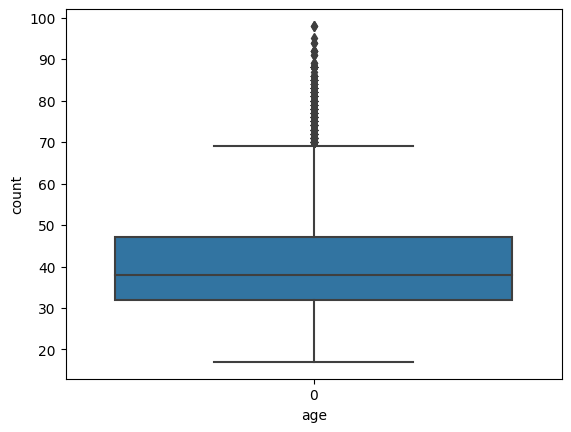

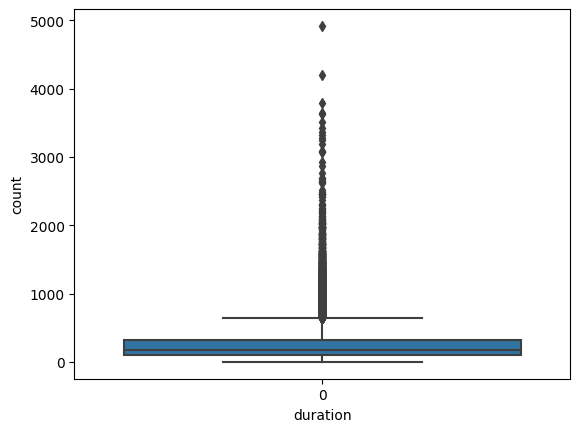

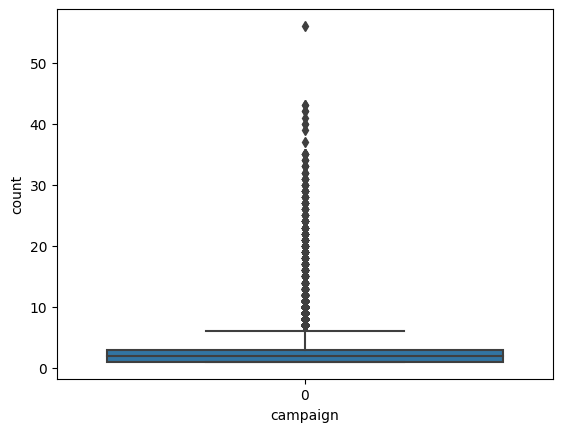

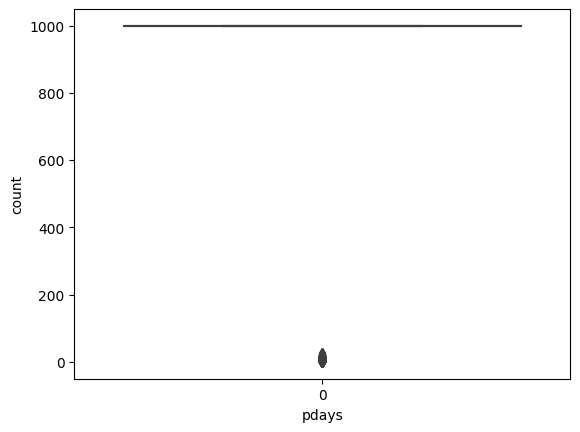

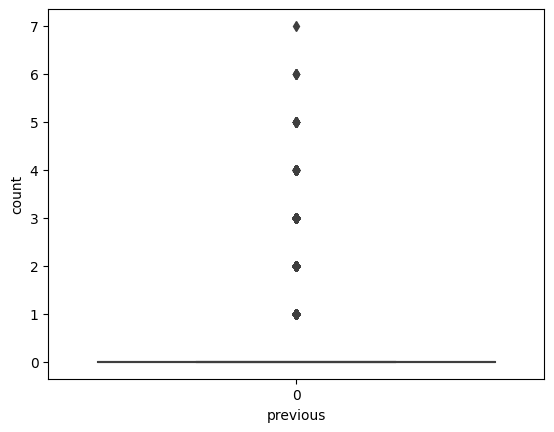

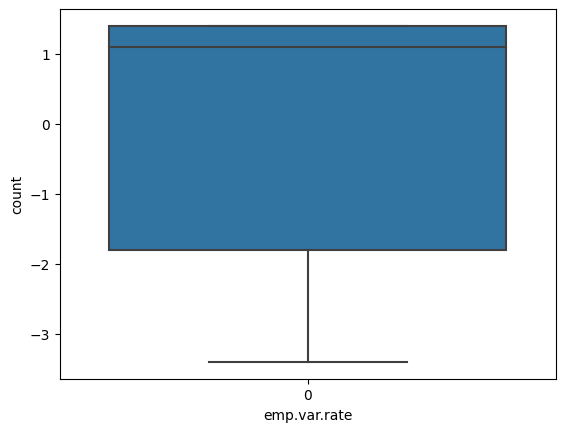

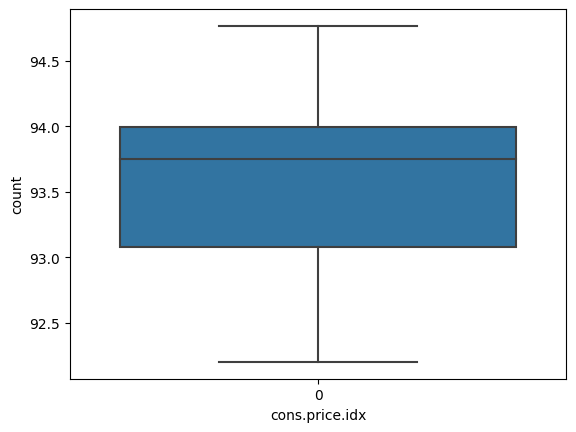

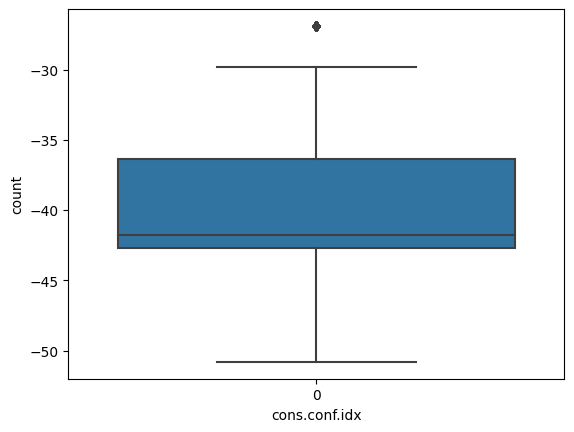

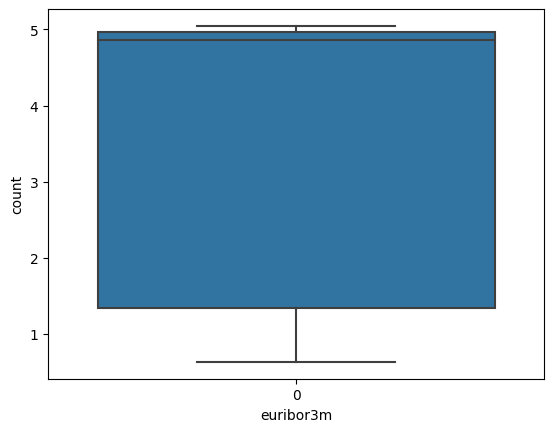

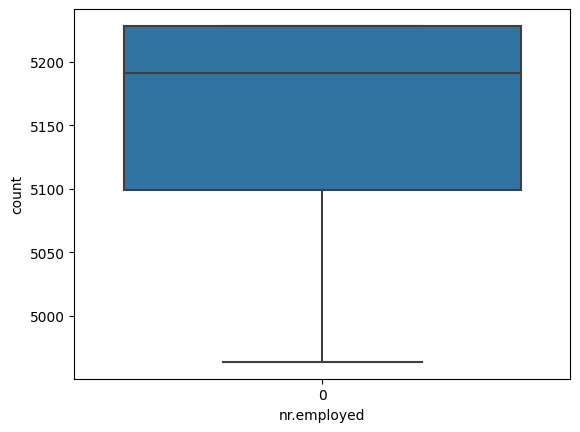

In [62]:
for col_name in col:
    if (data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [63]:
data['pdays'].value_counts()


999.0    39681
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
22.0         3
19.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
Name: pdays, dtype: int64

In [64]:
data['previous'].value_counts()

0.0    35563
1.0     4569
2.0      754
3.0      216
4.0       70
5.0       18
6.0        5
7.0        1
Name: previous, dtype: int64

In [65]:
#handling outlier


In [69]:
''' for example if you want to use loop

col_names=['age','duration','campaign','cons.conf.idx']
for col in col_names:
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  data=data[(data[col]>=Q1-1.5*IQR)& (data[col] <=Q3+1.5*IQR)]
  '''


"\ncol_names=['age','duration','campaign','cons.conf.idx']\nfor col in col_names:\n  Q1=data[col].quantile(0.25)\n  Q3=data[col].quantile(0.75)\n  IQR=Q3-Q1\n  data=data[(data[col]>=Q1-1.5*IQR)& (data[col] <=Q3+1.5*IQR)]\n  "

In [66]:
col_names=['age','duration','campaign','cons.conf.idx']
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
IQR=Q3-Q1
data=data[(data.age>=Q1-1.5*IQR)& (data.age <=Q3+1.5*IQR)]


Q1=data.duration.quantile(0.25)
Q3=data.duration.quantile(0.75)
IQR=Q3-Q1
data=data[(data.duration>=Q1-1.5*IQR)& (data.duration <=Q3+1.5*IQR)]

Q1=data.campaign.quantile(0.25)
Q3=data.campaign.quantile(0.75)
IQR=Q3-Q1
data=data[(data.campaign>=Q1-1.5*IQR)& (data.campaign <=Q3+1.5*IQR)]

Q1=data['cons.conf.idx'].quantile(0.25)
Q3=data['cons.conf.idx'].quantile(0.75)
IQR=Q3-Q1
data=data[(data['cons.conf.idx']>=Q1-1.5*IQR)& (data['cons.conf.idx'] <=Q3+1.5*IQR)]



In [67]:
data

age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41181  37.0       admin.  married    university.degree       no     yes   no   
41182  29.0   unemployed   single             basic.4y       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0  999.0       0.0   
1      telephone   may         mon  ...       1.0  999.0       0.0   
2      telephone   may         mon  ...       1.0  999.0       0.0   
3      telephone   may         mon  ...       1.0  999.0       0.0   
4      telephone   may         mon  ...       1.0  999.0       0.0   
...          ...   ...         ...  ...       ...    ...       ...   
41181   cellular   nov         fri  ...       1.0  999.0       0.0   
41182   cellular   nov         fri  ...       1.0    9.0       1.0   
41184   cellular   nov         fri  ...       1.0  999.0       0.0   
41185   cellular   nov         fri  ...       2.0  999.0       0.0   
41186   cellular   nov         fri  ...       1.0  999.0       0.0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41181  nonexistent         -1.1          94.767          -50.8      1.028   
41182      success         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41181       4963.6  yes  
41182       4963.6   no  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  

[35176 rows x 21 columns]

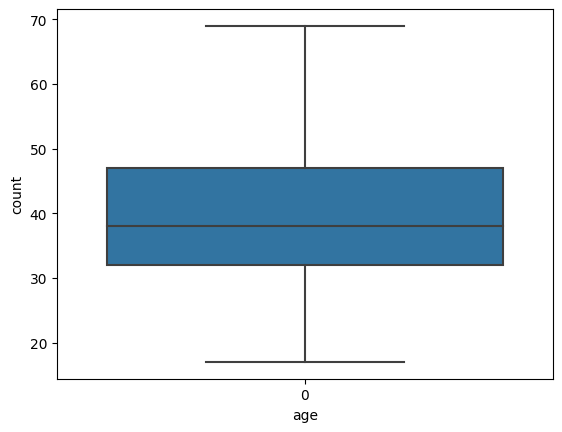

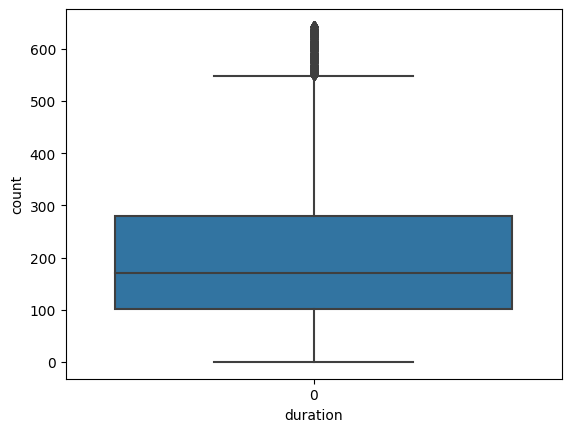

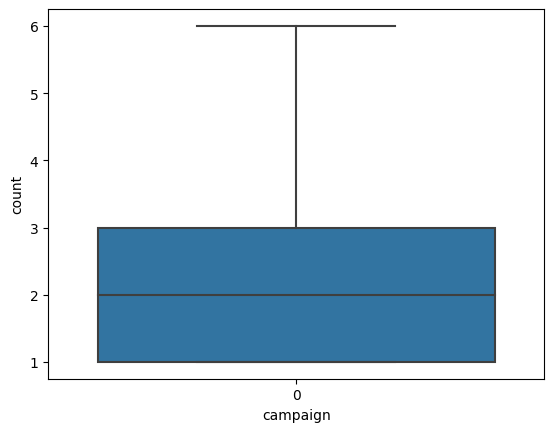

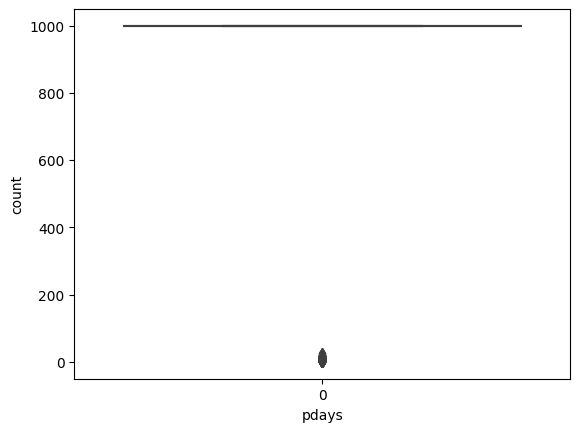

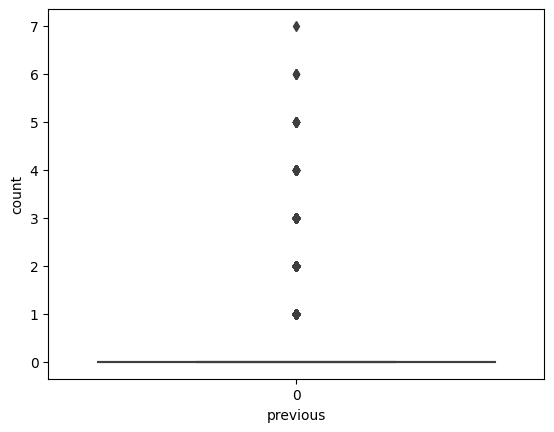

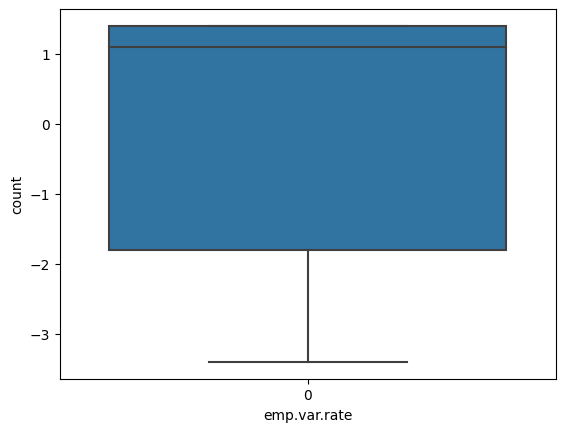

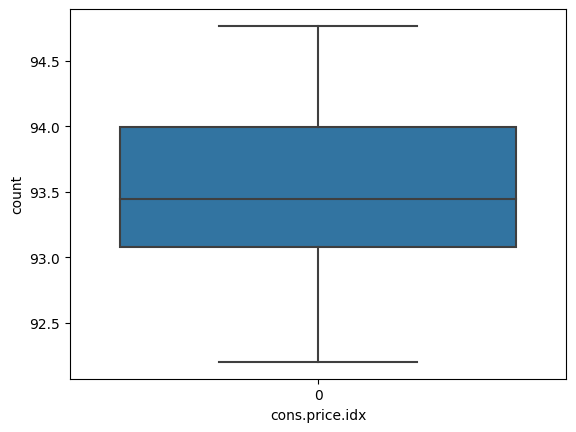

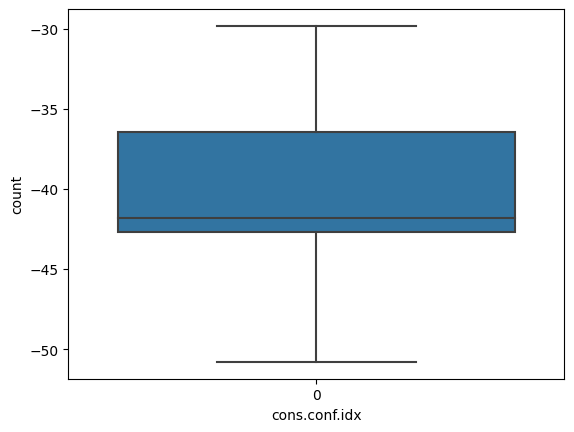

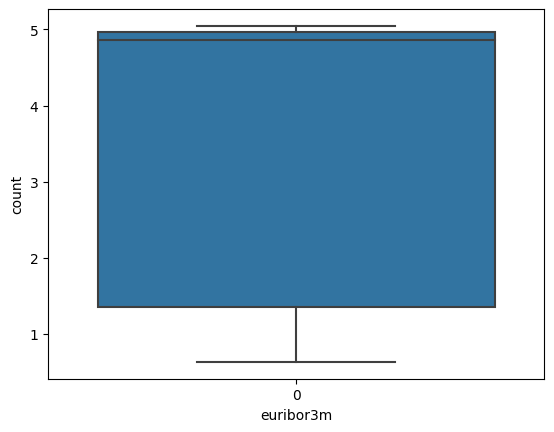

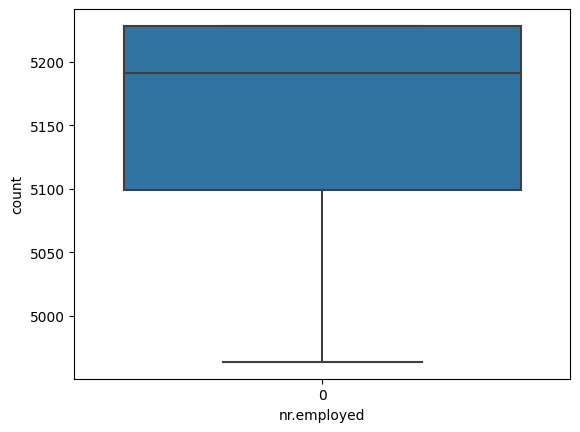

In [68]:
for col_name in col:
    if (data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [70]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [74]:
!pip install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bded8a3416e3f39e90fe555b0f2601fa6d9bc6c3c7cb0d2a8d7baedb5e093098
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [75]:
from pandas_profiling import ProfileReport

In [78]:
data1=pd.read_csv('/content/bank-additional-full-1.csv',sep=';')

In [79]:
profile=ProfileReport(data1)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [81]:
profile.to_file('report2.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [82]:
data['y'].value_counts()

no     32445
yes     2731
Name: y, dtype: int64

In [83]:
data['y']=np.where(data['y']=='yes',1,0)

In [84]:
data['y']=data['y'].astype(str)

In [85]:
data['y'].value_counts()

0    32445
1     2731
Name: y, dtype: int64

In [86]:
data

age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41181  37.0       admin.  married    university.degree       no     yes   no   
41182  29.0   unemployed   single             basic.4y       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0  999.0       0.0   
1      telephone   may         mon  ...       1.0  999.0       0.0   
2      telephone   may         mon  ...       1.0  999.0       0.0   
3      telephone   may         mon  ...       1.0  999.0       0.0   
4      telephone   may         mon  ...       1.0  999.0       0.0   
...          ...   ...         ...  ...       ...    ...       ...   
41181   cellular   nov         fri  ...       1.0  999.0       0.0   
41182   cellular   nov         fri  ...       1.0    9.0       1.0   
41184   cellular   nov         fri  ...       1.0  999.0       0.0   
41185   cellular   nov         fri  ...       2.0  999.0       0.0   
41186   cellular   nov         fri  ...       1.0  999.0       0.0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41181  nonexistent         -1.1          94.767          -50.8      1.028   
41182      success         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41181       4963.6  1  
41182       4963.6  0  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  

[35176 rows x 21 columns]

In [87]:
bins=[0,50,100]
data['age']=pd.cut(data['age'],bins)
data['age']=data.age.astype(str)

In [88]:
data

age          job  marital            education  default housing  \
0      (50, 100]    housemaid  married             basic.4y       no      no   
1      (50, 100]     services  married          high.school  unknown      no   
2        (0, 50]     services  married          high.school       no     yes   
3        (0, 50]       admin.  married             basic.6y       no      no   
4      (50, 100]     services  married          high.school       no      no   
...          ...          ...      ...                  ...      ...     ...   
41181    (0, 50]       admin.  married    university.degree       no     yes   
41182    (0, 50]   unemployed   single             basic.4y       no     yes   
41184    (0, 50]  blue-collar  married  professional.course       no      no   
41185  (50, 100]      retired  married    university.degree       no     yes   
41186    (0, 50]   technician  married  professional.course       no      no   

      loan    contact month day_of_week  ...  campaign  pdays  previous  \
0       no  telephone   may         mon  ...       1.0  999.0       0.0   
1       no  telephone   may         mon  ...       1.0  999.0       0.0   
2       no  telephone   may         mon  ...       1.0  999.0       0.0   
3       no  telephone   may         mon  ...       1.0  999.0       0.0   
4      yes  telephone   may         mon  ...       1.0  999.0       0.0   
...    ...        ...   ...         ...  ...       ...    ...       ...   
41181   no   cellular   nov         fri  ...       1.0  999.0       0.0   
41182   no   cellular   nov         fri  ...       1.0    9.0       1.0   
41184   no   cellular   nov         fri  ...       1.0  999.0       0.0   
41185   no   cellular   nov         fri  ...       2.0  999.0       0.0   
41186   no   cellular   nov         fri  ...       1.0  999.0       0.0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41181  nonexistent         -1.1          94.767          -50.8      1.028   
41182      success         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41181       4963.6  1  
41182       4963.6  0  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  

[35176 rows x 21 columns]

In [89]:
#Feature selection technique

In [ ]:
#chi-sqaured
#IV analysis
#vif